# View Calspec SED 

- Author Sylvie Dagoret-Campagne
- Creation : 25 september 2019
- Update : October 7th 2019
- Update : April 20th 2020 for package PhotomCorrectAuxTel

In [18]:
import os
import numpy as np

In [19]:
from astropy.table import Table
from astropy.io import fits

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [21]:
import pysynphot as S

In [22]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [23]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(24,18)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

# Read the Table

In [24]:
#t=Table.read('table_summary_allcalspec.fits')
t=Table.read('table_summary_calspec_hd.fits')  # view only HD type stars
#t=Table.read('table_summary_allcalspec.fits')  # view only HD type stars

In [25]:
print(t)

OBJNAME          RA         ...        magV                FILES         
-------- ------------------ ... ------------------ ----------------------
HD009051 22.193760833333332 ...  8.920000076293945 hd009051_stis_003.fits
HD031128  73.04129041666667 ...  9.140000343322754 hd031128_stis_003.fits
HD074000        130.2116825 ...   9.65999984741211 hd074000_stis_003.fits
HD106252 183.37295833333332 ...              1e+20 hd106252_stis_004.fits
HD111980 193.31271999999998 ...  8.380000114440918 hd111980_stis_003.fits
HD116405 200.68801541666664 ...   8.34000015258789 hd116405_stis_004.fits
 HD14943  35.72781333333333 ... 5.8979997634887695  hd14943_stis_004.fits
HD158485 261.52015416666666 ...   6.49399995803833 hd158485_stis_004.fits
HD159222 263.00413416666663 ...              1e+20 hd159222_stis_004.fits
HD160617  265.7055145833333 ...  8.729999542236328 hd160617_stis_003.fits
HD163466 268.10573166666666 ...  6.849999904632568 hd163466_stis_004.fits
HD180609  288.1966645833333 ...  9.420

# Select the star

In [26]:
SED_SELECTED=["HD111980"]

In [27]:
NBFILES=len(t)

In [28]:
# A flag to turn off plotting calspec
# In some cases the flag VISIBILITY may correspond to a flag saying if the star is visible
FLAG_VISIBILITY= [True] * len(t)

In [29]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBFILES), alpha=1)

# Flux in linear scale

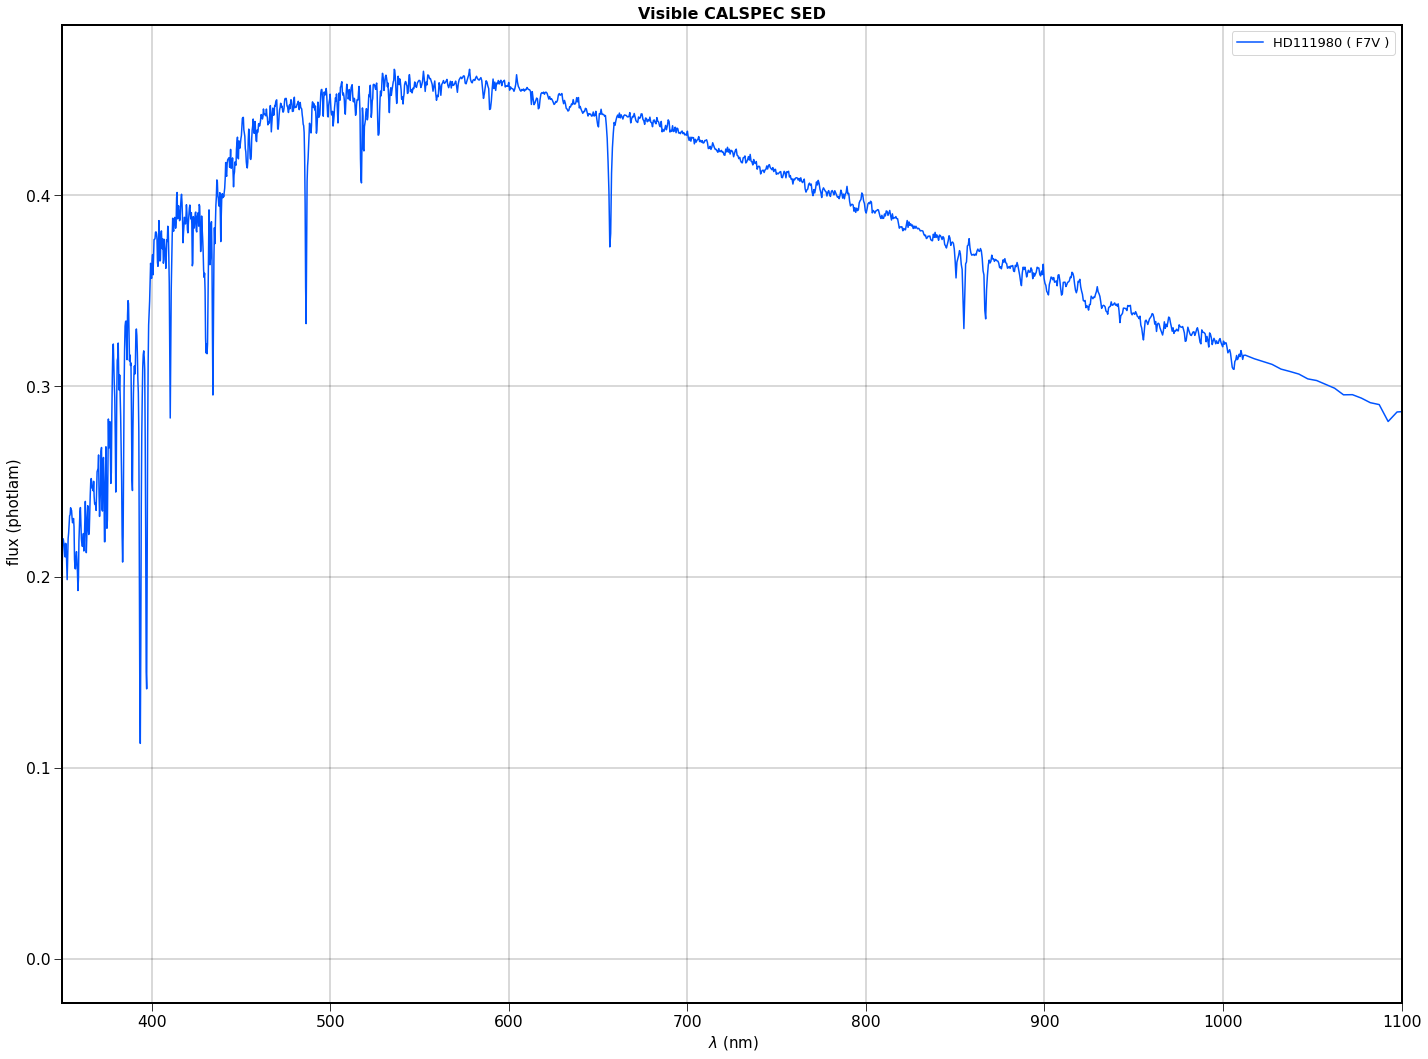

In [30]:
idx=0
for filename in t["FILES"]:
    
    
    if FLAG_VISIBILITY[idx] and t[idx]["OBJNAME"] in SED_SELECTED: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')    
        
        label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )"
        plt.plot(spec.wave, spec.flux,color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(350.,1100.)
#plt.ylim(0.,1.)
plt.legend()
plt.grid()

fign="all_viscalspec_spectra_lin.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' flux ({})'.format(spec.fluxunits.name)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC SED")
plt.grid(color="k")
plt.savefig(fign)

# Show relative flux renormalised to flux at 500 nm in linear scale

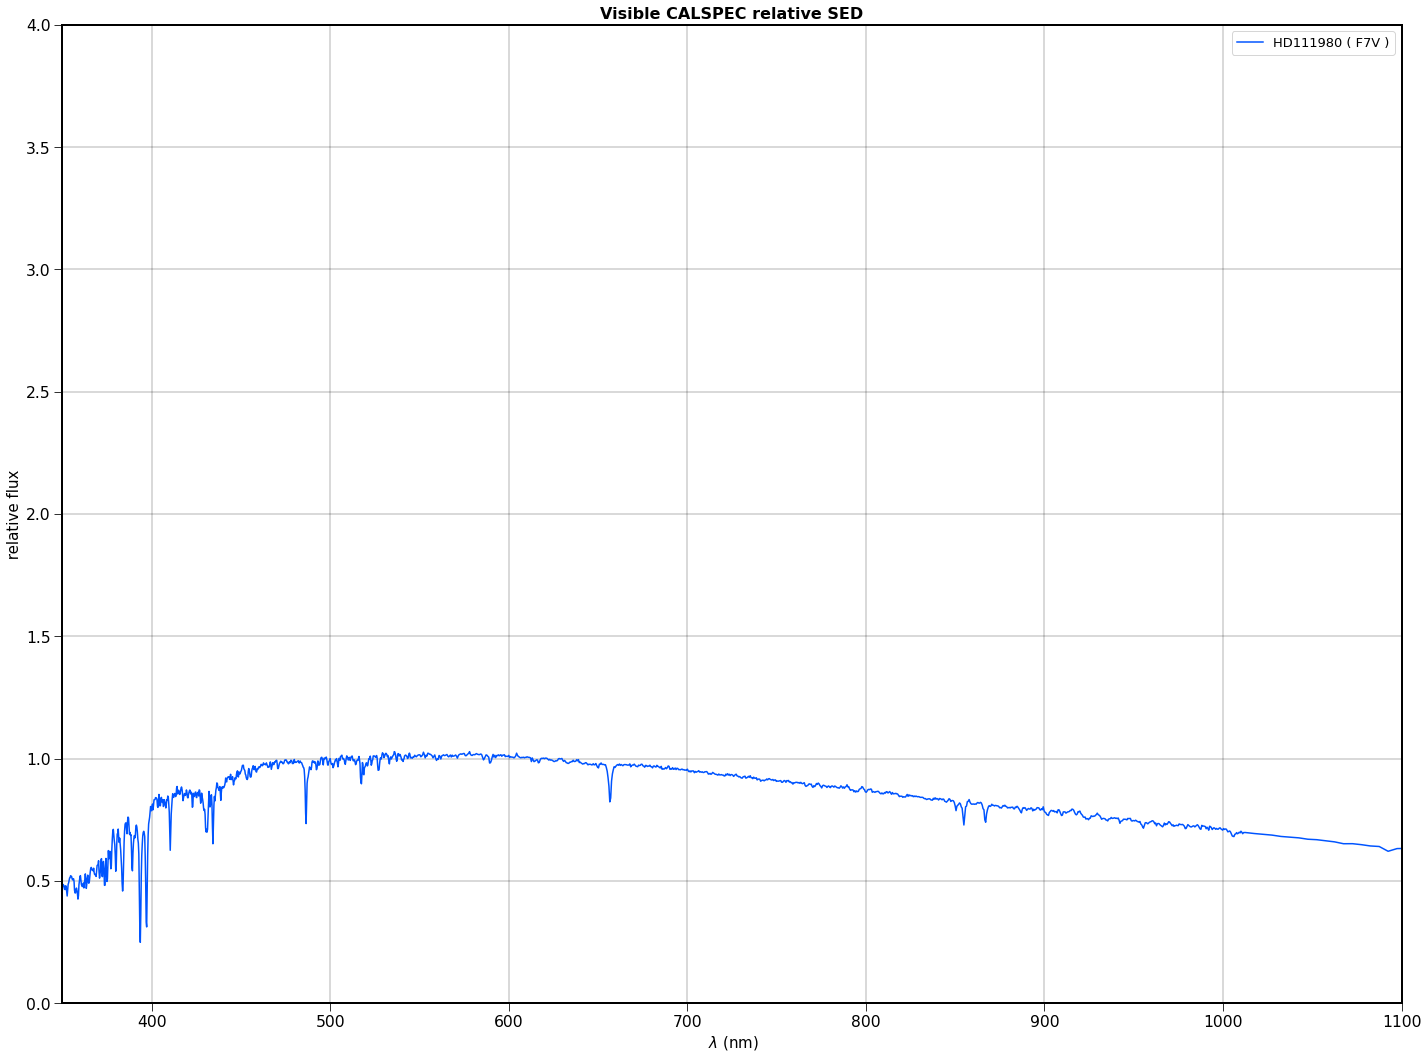

In [31]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx] and  t[idx]["OBJNAME"] in SED_SELECTED: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')    
        
        # wavelength bin at 500 nm
        #-----------------------------
        wl_idx=np.argmin(np.abs(spec.wave-500))
        
        label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )"
        
        plt.plot(spec.wave, spec.flux/spec.flux[wl_idx],color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(350.,1100.)
plt.ylim(0.,4.)
plt.legend()
plt.grid()

fign="all_viscalspec_relspectra_lin.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' relative flux '
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC relative SED")
plt.grid(color="k")
plt.savefig(fign)

In [32]:
np.argmin(np.abs(spec.wave-500))

1689

In [33]:
spec.wave[2161]

695.1775878999999

# Flux in log scale

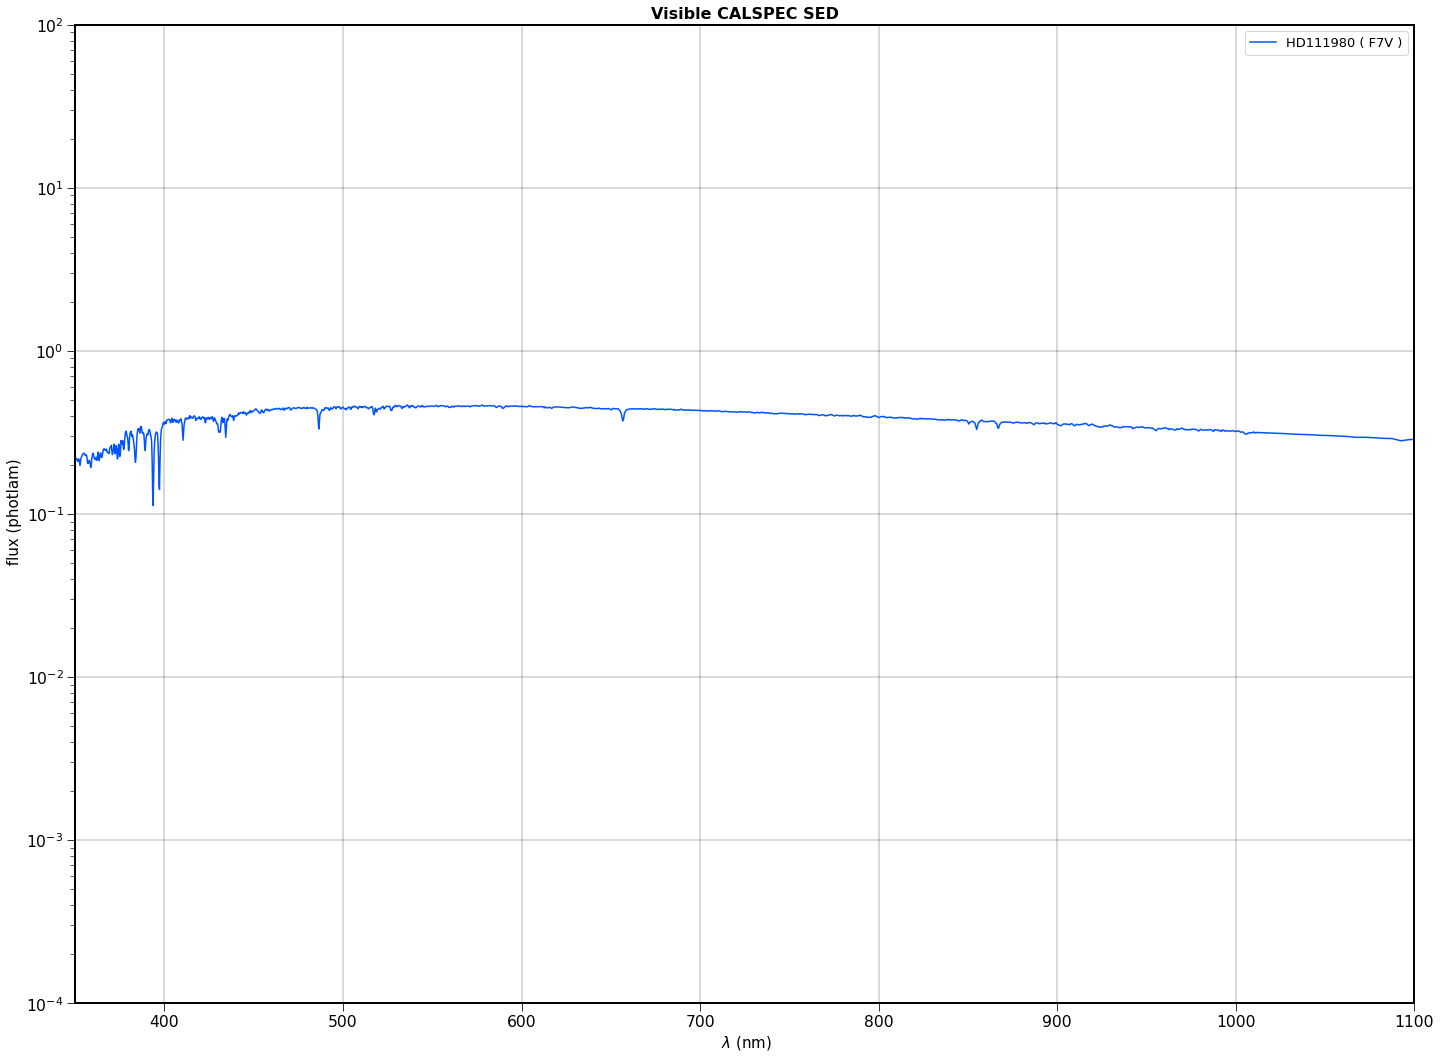

In [34]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx] and t[idx]["OBJNAME"] in SED_SELECTED: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')    
        
        label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )"
            
        plt.semilogy(spec.wave, spec.flux,color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(350.,1100.)
plt.ylim(.0001,100.)
#plt.ylim(0.,1.)
plt.legend()
plt.grid()

fign="all_viscalspec_spectra_log.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' flux ({})'.format(spec.fluxunits.name)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC SED")
plt.grid(color="k")
plt.savefig(fign)